<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#集成学习" data-toc-modified-id="集成学习-1">集成学习</a></span></li><li><span><a href="#1.-投票分类器" data-toc-modified-id="1.-投票分类器-2">1. 投票分类器</a></span><ul class="toc-item"><li><span><a href="#1.1-硬投票法" data-toc-modified-id="1.1-硬投票法-2.1">1.1 硬投票法</a></span></li><li><span><a href="#1.2-软投票法" data-toc-modified-id="1.2-软投票法-2.2">1.2 软投票法</a></span></li></ul></li><li><span><a href="#2.-Bagging-&amp;-Pasting" data-toc-modified-id="2.-Bagging-&amp;-Pasting-3">2. Bagging &amp; Pasting</a></span><ul class="toc-item"><li><span><a href="#2.1-包外评估" data-toc-modified-id="2.1-包外评估-3.1">2.1 包外评估</a></span></li><li><span><a href="#2.2-Random-Patches-和-随机子空间" data-toc-modified-id="2.2-Random-Patches-和-随机子空间-3.2">2.2 Random Patches 和 随机子空间</a></span></li></ul></li><li><span><a href="#3.-随机森林" data-toc-modified-id="3.-随机森林-4">3. 随机森林</a></span><ul class="toc-item"><li><span><a href="#3.1-极端随机树" data-toc-modified-id="3.1-极端随机树-4.1">3.1 极端随机树</a></span></li><li><span><a href="#3.2-特征重要性" data-toc-modified-id="3.2-特征重要性-4.2">3.2 特征重要性</a></span></li></ul></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-5">参考资料</a></span></li></ul></div>

相关文章：

[机器学习 | 目录](https://blog.csdn.net/weixin_45488228/article/details/99691709)

[监督学习 | 决策树原理及Python实现](https://blog.csdn.net/weixin_45488228/article/details/98665115)

[监督学习 | 决策树之Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/98751821)

[监督学习 | 集成学习之AdaBoost原理及Slearn实现]()

# 集成学习

`集成学习`（ensemble learning）通过构建并结合多个学习器来完成学习任务，有时也被称为多分类器系统（multi-classifier system）、基于委员会的学习（committee-based learning）等。

下图显示出集成学习的一般结构：先产生一组“`个体学习器`”（individual learner），再用某种策略将它们结合起来，此时集成中只包括**同种类型**的个体学习器，例如“决策树集成”中全是决策树，“神经网络集成”中全是神经网络，这样的集成是“`同质的`”（homogeneous）。`同质集合`中的个体学习器亦称“`基学习器`”（base learner），相应的学习算法称为“`基学习算法`”（base learning algorithm）。

集成也可以包含不同类型的个体学习器，例如同时包含决策树和神经网络，这样的集成是“`异质`”的（heterogenous）。`异质集成`中的个体学习器由不同的学习算法生成，这时不再有基学习算法；相应的，个体学习器一般不称为基学习器，常称为“`组件学习器`”（component learner）或直接称个体学习器。

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-20 at 21.36.48.png" width="520" >

<center> 图1 集成学习示意图</center>

集成学习通过将多个学习器进行结合，常可获得比单一学习器显著优越的泛化性能。这对“**弱学习器**”（weak learner）尤为明显，因此集成学习都是针对弱学习器进行的，而基学习器有时也被直接称为`弱学习器`。但需要注意的是，虽然从理论上来说使用弱学习器集成足以获得更好的性能，但在实践中处于种种考虑，例如希望使用较少的个体学习器，或是重用关于常见学习器的一些经验等，人们往往还会使用比较强的学习器。

> `弱学习器`：常指泛化能力略优于随机猜测的学习器；例如在二分类问题上精度率高于 50% 的分类器。

根据个体学习器的生成方式，目前的集成学习方法大致可分为两大类，即个体学习器剪存在强以来关系、必须串行生成的序列化方法（Boosting，降低偏差），以及个体学习器间不存在强依赖关系、可同时生成的并行化方法（Bagging、随机森林，降低方差）。<sup>[1]


<center> 表1 集成算法分类</center>

| 个体学习器\聚合函数| 平均法【回归】|投票法【分类】 |学习法|
|--- |---|---|---|
|基学习器（同质） |Bagging、随机森林  |Bagging、随机森林 |AdaBooting |
|组件学习器（异质） |\ |投票分类器|\|

# 1. 投票分类器

## 1.1 硬投票法
假设你已经训练好了一些分类器，每个分类器的准确率约为 80% 。大概包括：一个逻辑回归分类器、一个 SVM 分类器、一个随机森林分类器、一个 K-近邻分类器，如下图所示：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-20 at 22.22.40.png" width="520" >

<center> 图2 训练多重分类器</center>

这时，要创建出一个更好的分类器，最简单的办法就是聚合每个分类器的预测，然后将得到票最多的结果最为预测类别。这种大多数投票分类器被称为`硬投票分类器`。

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-20 at 22.22.48.png" width="520" >

<center> 图3 硬投票分类器预测</center>

> 当预测器尽可能互相独立时，集成方法的效果最优。获得多种分类器的方法之一就是使用不同的算法进行训练。这会增加它们犯不同类型错误的机会，从而提升集成的准确率。

**Sklearn 实现：**

Sklearn中的 [VotingClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) 类可以实现投票分类器。

``` Python
from sklearn.ensemble import VotingClassifier

VotingClassifier(estimators, voting='hard', weights=None, n_jobs=None, flatten_transform=True)
```

**参数设置：**


**estimator**: *slist of (string, estimator) tuples*

    Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_. An estimator can be set to None or 'drop' using set_params.
    
**voting**: *str, {‘hard’, ‘soft’} (default=’hard’)*

    If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

**weights**: *array-like, shape (n_classifiers,), optional (default=`None`)*

    Sequence of weights (float or int) to weight the occurrences of predicted class labels (hard voting) or class probabilities before averaging (soft voting). Uses uniform weights if None.

**n_jobs**: *int or None, optional (default=None)*

    The number of jobs to run in parallel for fit. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
    
    【并行 CPU 数量，-1 为使用所有可用 CPU】

**flatten_transform**: *bool, optional (default=True)*

    Affects shape of transform output only when voting=’soft’ If voting=’soft’ and flatten_transform=True, transform method returns matrix with shape (n_samples, n_classifiers * n_classes). If flatten_transform=False, it returns (n_classifiers, n_samples, n_classes).

In [1]:
# 1. 导入数据：
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. 训练个体预测器：
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)


# 3. 导入硬投票分类器并拟合：
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

# 4. 看看每个分类器在测试集上的准确率，可以看到投票分类器略胜于所有个体分类器。
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


## 1.2 软投票法

如果所有分类器都能够估算出类别的概率（即有 predict_proba() 方法），那么可以将概率在所有单个分类器傻姑娘平均，然后将平均概率最高的类别作为预测，这被称为`软投票法`。通常来说，它比硬投票法的表现更优，因为它给予那些高度自信的投票更高的权重。

**Sklearn 实现：**
 
``` Python
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)
```

注意！需要确保所有分类器都可以估算出概率。默认情况下，SVC 类是不行的，所以需要将其超参数 probability 设为 True（这会导致 SVC 使用交叉验证来估算类别概率，减慢训练速度）。

In [2]:
# 1. 导入数据
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. 训练个体分类器：
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

# 3. 导入软投票分类器并拟合：
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


可以看见，软投票器的准确率从硬投票器的 89.6% 提升到了 91.2%。

# 2. Bagging & Pasting

旗面提到，获得不同种类分类器的方法之一是使用不同的训练算法。还有另一种方法是每个个体学习器使用的算法相同（基学习器），但是在不同的训练集**随机子集**上进行训练。

- 采样时如果将`样本放回`，这种方法叫作 `bagging`（bootstrap aggregating，自举汇聚法）。

- 采样时如果`样本不放回`，这种方法叫作 `pasting`。

换句话说，bagging 和 pasting 都允许训练实例在多个基学习器中被采样，但是只有 bagging 允许训练实例被同一个基学习器多次采样。

采样过程和训练过程如下图所示：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/Screen Shot 2019-08-20 at 23.01.51.png" width="520" >

<center> 图4 pasting/bagging 训练集采集和训练</center>

一旦预测器训练完成，集成就可以通过简单地聚合所有预测器的预测，来对新实例做出预测。聚合函数通常是`统计法`（即硬投票法）用于`分类`，或是`平均法`用于`回归`；在 Sklearn 中，如果基学习器能够估算类别概率（SVM 需添加超参数 probability=True），则将使用软投票法。

每个基学习器单独的偏差都高于原始训练集上训练的偏差，但是通过聚合，同时降低了偏差和方法。总的来说，最终结果是，于直接在原始训练集上训练的单个基学习器相比，集成的偏差相近，但是方差更低。

如图 4 所示，可以通过不同的 CPU 内核甚至是不同的服务器，并行地训练集基学习器。类似地，预测也可以并行。这正是 bagging 和 pasting 方法流行的原因之一，它们非常易于拓展。

**Slearn实现：**

Sklearn 提供了一个简单的 API，可用 [BaggingClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) 类进行 bagging 和 pasting （或 [BaggingRegressor]() 用于回归）。

``` Python
from sklearn.ensemble import BaggingClassifier

BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)[source]¶
```

**参数设置：**

**base_estimator**: 基学习器

**n_estimators**: 基学习器数量

**max_samples**: 0.0～1.0，每个基学习器的训练样本量 【对样本进行抽样】

**bootstrap**: True，默认 bagging，想要使用 pasting 可以设置为 False 【抽样样本是否放回】

**max_features**：int or float, optional (default=1.0) 【对特征进行抽样】（2.2）

**bootstrap_features**：False，默认 bagging，想要使用 pasting 可以设置为 False 【抽样特征是否放回】（2.2）

**n_jobs**: CPU 核数，-1 为使用所有内核

**oob_score**： False，包外评估（2.1）

如果基学习器能够估算类别概率（SVM 需添加超参数 probability=True），则将使用软投票法。

下面使用决策树作为基学习器，进行 Bagging 集成学习：

In [3]:
# 导入数据
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 以 500 个决策树作为基学习器，创建并拟合 Bagging 集成学习器
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500,
    max_samples=100,
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


可以看到，使用决策树作为基学习器的 Bagging 集成算法（随机森林）的准确率与投票分类器相仿，我们来比较一下同单一的决策树相比，集成算法的准确率和边界：

In [4]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

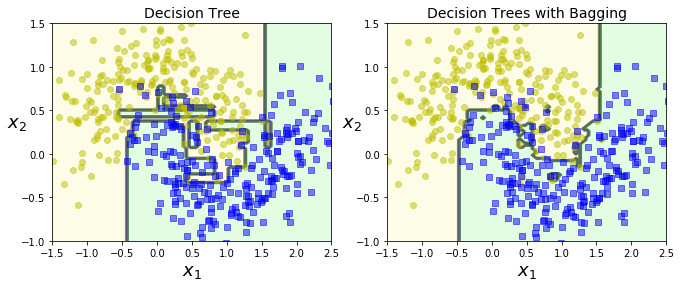

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

<center> 图5 单个决策树与 500 个决策树的 bagging 集成对比</center>

图 5 比较了两种决策边界，一个是单个的决策树，一个是由 500 个决策树组成的 bagging 集成，均在卫星数据集上训练完成。可以看出，集成预测的泛化效果很可能比单独的决策树要好一些；二者偏差相近，但是集成的方差更小（两边训练集上的错误数量差不多，但是集成的决策边界更规则）。

## 2.1 包外评估

对于任意给定的基学习器，使用 bagging，有些实例可能会被采样多次，而有些实例则可能根本不被采用。BaggingClassifier 默认采样 m 个训练实例，然后放回样本（bootstrap=True），m 是训练集的大小。这意味着对每个预测器来说，平均只对 63% 的训练实例进行采样。剩余 37% 未被采样的训练实例称为`包外`（oob）实例。注意，对于所有基学习器来说，这是不一样的 37%。

> 随着 m 增长，这个比率接近 $1-exp(-1) \approx 63.212%$

既然基学习器在训练的时候从未见过这些包外实例，正好可以用这些实例进行评估，从而不需要单独的验证集或是交叉验证。将每个训练器在其包外实例上的评估结果进行平均，就可以得到对集成的评估。

**Sklearn实现：**

在 Sklearn 中，创建 BaggingClassifier 时，设置 `oob_score=True`，就可以在训练结束后自动进行包外评估。

In [15]:
# 通过变量 oob_score_ 获得最终评估分数
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500,
    oob_score=True,
    bootstrap=True, 
    n_jobs=-1, 
    random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

根据包外评估结果，这个 BaggingClassifier 分类器很可能在测试集上达到约 89.87%的准确率，通过下面的验证，我们得到在测试集上的准确率为 91.2%，与上面结果非常接近。

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


每个训练实例的包外决策函数也可以通过变量 `oob_decision_function_` 获得。本例中（基学习器具备 predict_proba() 方法），决策函数返回的是每个实例的类别概率。例如，包外评估估计，第二个训练实例有 60.6% 的概率属于正类（以及 39.4% 的概率属于负类）：

In [19]:
bag_clf.oob_decision_function_[:10]

array([[0.32352941, 0.67647059],
       [0.35625   , 0.64375   ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97409326, 0.02590674]])

## 2.2 Random Patches 和 随机子空间

BaggingClassifier 也支持对特称进行抽样（之前是对数据进行抽样），这通过两个超参数决定：“`max_samples`”和“`bootstrap_features`”。它们的工作方式跟 max_samples 和 bootstrap 相同，只是抽样对象不再是实例，而是特征。因此，每个基学习器将用输入特征的随机子集进行训练。

这对于处理高维输入（例如图像）特别有用。对训练实例和特征都进行抽样，这被称为 `Random Patches` 方法。

而保留所有训练实例（即 bootstrap=Flase 并且 max_sample=1.0）但是对特征进行抽样（即 bootstrap_features=True 并且/或 max_features<1.0），这被称为`随机子空间法`。

对特征抽样给基学习器带来更大多多样性，所以以略高一点的偏差换取来更低的方差。

# 3. 随机森林

随机森林是[决策树](https://blog.csdn.net/weixin_45488228/article/details/98665115)（无剪枝）的集成，随机森林里单颗树的生长过程中，每个节点在分裂时仅考虑一个随机子集包含的特征。通常用 bagging （有时也可能是 pasting）方法训练（如2. Bagging & Pasting 一样）。训练集大小通过 max_samples 来设置。除了先构建一个 BaggingClassifier 然后将结果传输到 DecisionTreeClassifier，还有一种方法就是使用 `RandomForestClassifier` 类，这种方法更方便，对决策树更优化（同样，对于回归任务也有一个 `RadomForestRegressor` 类）。

**Sklearn 实现：**

``` Python
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0)
```

参数设置：

除了少量例外，RandomForestClassifier 具有 DecisionTreeClassifier 以及 BaggingClassifier 的所有超参数，前者用来控制树的生长，后者用来控制集成本身。

> 少量例外：没有splitter（强制为 random），没有 presort（强制为 False），没有 max_samples（强制为1.0），没有 base_estimator（强制为 DecisionTreeClassifier 与给定超参数）


In [23]:
# BaggingClassifier 实现

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [24]:
# RandomForestClassifier 实现

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [25]:
# 比较两种方法的差距

np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976

## 3.1 极端随机树

随机森林里单颗树的生长过程中，每个节点在分裂时仅考虑一个随机子集包含的特征。如果我们对每个特征使用随机阈值，而不是搜索得出的最佳阈值（如常规决策树），则可能让决策树生长得更加随机。

这种极端随机的决策树组成的森林，被称为`极端随机树集成`（Extra-Trees）。同样，它也是以更高的偏差换取了更低的方差极端随机树训练起来比常规随机森林要快很多，因为在每个节点上找到每个特征的最佳阈值时决策树生长中最耗时的任务之一。

使用 Sklearn 的 [`ExtraTreesClassifier`](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) 的 API 与 RandomForestClassifier 相同。同理，[`ExtraTreesRegressor`](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor) 的 API 与 RandomForestRegressor 的API 也相同。

> 通常来说，很难预先知道 RandomForestClassifier 与 ExtraTreesClassifier 谁好谁差，唯一的方法就是两种都尝试一遍，然后使用交叉验证（还需要使用网络搜索调超参数）进行比较。

## 3.2 特征重要性

最后，如果查看单个决策树会发现，重要的特征更可能出现在靠近跟节点的位置，而不重要的特征通常出现在叶节点的位置（甚至根本不出现）。因此，通过计算一个特征在森林所有树上的平均深度，可以估算出一个特征的重要程度。Sklearn 在训练结束后自动计算每个特征的重要性。通过变量 `feature_importances_` 可以访问到这个计算结果。

下面在鸢尾花数据集上训练了一个 RandomForestClassifier，并输出了各个特征的重要性。看起来最重要的特征是花瓣长度（44%）和宽度（42%），而花萼的长度和宽度则相对不那么重要（分别是 11%和 2%）

In [30]:
from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.11051994534871025
sepal width (cm) 0.02132805477543799
petal length (cm) 0.41963589720955286
petal width (cm) 0.44851610266629877


所以，如果想要快速了解什么是真正的特征，随机森领是一个非常便利的方法，特别是当你需要执行特征选择的时候。<sup>[3]

# 参考资料

[1] 周志华. 机器学习[M]. 北京: 清华大学出版社, 2016: 171-172.

[2] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 165-168.

[3] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 169-174.